# Mersenne_twisterのコード

In [1]:
class MT:
    def __init__(self, seed):
        self.W = 32
        self.N = 624
        self.M = 397
        self.R = 31
        self.U = 11
        self.S = 7
        self.T = 15
        self.L = 18
        self.A = 0x9908B0DF
        self.B = 0x9D2C5680
        self.C = 0xEFC60000
        
        # ビットマスク用
        self.WHOLE_MASK = (1 << self.W) - 1
        self.UPPER_MASK = ((1 << self.W) - 1) & ~((1 << self.R) - 1)
        self.LOWER_MASK = (1 << self.R) - 1
        
        # MT内部状態
        self.i = 0
        self.x = [seed & self.WHOLE_MASK]
        
        # 初期化
        for i in range(1, self.N):
            self.x.append((1812433253 * (self.x[i-1] ^ (self.x[i-1] >> 30)) + i) & self.WHOLE_MASK)
    
    # MTで乱数を生成
    def next(self):
        # Step.1
        z = (self.x[self.i] & self.UPPER_MASK) | (self.x[(self.i + 1) % self.N] & self.LOWER_MASK)
        
        # Step.2
        self.x[self.i] = self.x[(self.i + self.M) % self.N] ^ (z >> 1) ^ (self.A if z & 1 else 0)
        
        # Step.3
        y = self.x[self.i]
        y ^= (y >> self.U)
        y ^= ((y << self.S) & self.B)
        y ^= ((y << self.T) & self.C)
        y ^= (y >> self.L)
        
        # カウンタを変更して、生成した乱数を返す
        self.i = (self.i + 1) % self.N
        return y

# Mersenne_twisterの乱数生成

In [2]:
mt = MT(20150919) # シード値
for i in range(10):
    print(f"{i}番目: {mt.next()}")

0番目: 909111202
1番目: 1775643220
2番目: 3451004665
3番目: 2605250323
4番目: 792343277
5番目: 400246621
6番目: 276307393
7番目: 1249125328
8番目: 2330296989
9番目: 749880315


# Xorshift32のコード

In [3]:
def xorshift32(seed=2463534242):


    def _random():
        nonlocal q
        q = q ^ (q << 13 & 0xFFFFFFFF)
        q = q ^ (q >> 17 & 0xFFFFFFFF)
        q = q ^ (q << 5 & 0xFFFFFFFF)

        return q & 0xFFFFFFFF

    q = seed
    return _random

# Xorshift32の乱数生成

In [5]:
x_32 = xorshift32(2463534242) # シード値
for i in range(10):
    print(f"{i}番目: {x_32()}")

0番目: 723471715
1番目: 2497366906
2番目: 2064144800
3番目: 2008045182
4番目: 3532304609
5番目: 374114282
6番目: 1350636274
7番目: 691148861
8番目: 746858951
9番目: 2653896249


# Xorshift128のコード

In [6]:
def xorshift128(x=123456789, y=362436069, z=521288629, w=88675123):

    def _random():
        nonlocal x, y, z, w
        t = x ^ ((x << 11) & 0xFFFFFFFF)  # 32bit
        #print(f'{t=}')
        x, y, z = y, z, w
        w = (w ^ (w >> 19)) ^ (t ^ (t >> 8))
        #print(f'{x=}')
        #print(f'{y=}')
        #print(f'{z=}')
        #print(f'{w=}')
        return w

    return _random

# Xorshift128の乱数生成

In [7]:
x_128 = xorshift128(x=123456789, y=362436069, z=521288629, w=88675123) # シード値
for i in range(10):
    print(f"{i}番目: {x_128()}")

0番目: 3701687786
1番目: 458299110
2番目: 2500872618
3番目: 3633119408
4番目: 516391518
5番目: 2377269574
6番目: 2599949379
7番目: 717229868
8番目: 137866584
9番目: 395339113


# random関数のコード

[randommodule](https://github.com/python/cpython/blob/main/Modules/_randommodule.c)

In [8]:
import random

random.seed(20150919)

# 乱数を生成
for i in range(10):
    print(f"{i}番目: {random.getrandbits(32)}")

0番目: 4104874304
1番目: 1696908957
2番目: 271093810
3番目: 920192649
4番目: 3389050373
5番目: 4012423974
6番目: 40179493
7番目: 1523205539
8番目: 3694761199
9番目: 2273220203


# 各々の1,000,000回生成させた時間

In [9]:
%%timeit

mt = MT(20150919) # シード値
for i in range(100):
    j = mt.next()

199 μs ± 2.01 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
%%timeit

x_32 = xorshift32(2463534242) # シード値
for i in range(100):
    j = x_32()

31.4 μs ± 1.9 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [11]:
%%timeit

x_128 = xorshift128(x=123456789, y=362436069, z=521288629, w=88675123) # シード値
for i in range(100):
    j = x_128()

28.4 μs ± 483 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
%%timeit
import random

random.seed(20150919)

# 乱数を生成
for i in range(100):
    j = random.getrandbits(32)

10.2 μs ± 433 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# 各々の1,000,000回生成させたヒストグラム

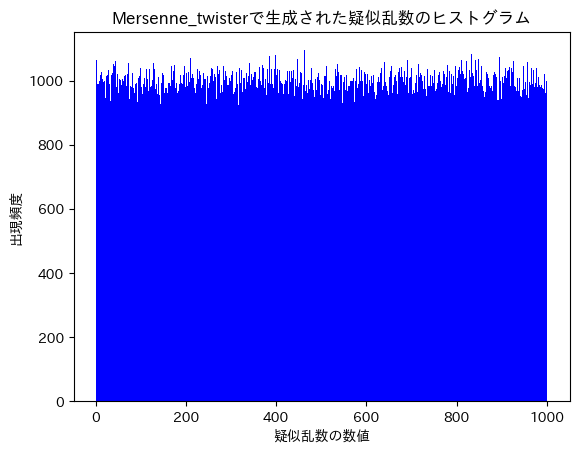

最大値: (1098, 538)
最小値: (898, 343)
平均値: 1000.0


In [13]:
import matplotlib.pyplot as plt
import japanize_matplotlib

def main():
    MAX = 1000  # 乱数の最大値
    FREQUENCY = 2  # 乱数の記録頻度

    mt = MT(20150919)
    rand_nums = []  # 生成された乱数を格納するリスト
    rand_hist = [0] * MAX  # ヒストグラム用のリスト
    
    # MAX*1000個の乱数を生成し, リストに追加
    for i in range(MAX*1000*FREQUENCY):
        rand_num = mt.next() % MAX + 1
        if i % FREQUENCY == 0:
            rand_nums.append(rand_num)
            rand_hist[rand_num - 1] += 1
        
    # ヒストグラムを作成
    plt.hist(rand_nums, bins=MAX, color='blue')
    plt.title('Mersenne_twisterで生成された疑似乱数のヒストグラム')
    plt.xlabel('疑似乱数の数値')
    plt.ylabel('出現頻度')
    plt.show()
    # 出現頻度の最大値, 最小値, 平均値を表示
    print(f'最大値: {max(rand_hist),rand_hist.index(max(rand_hist))}')
    print(f'最小値: {min(rand_hist),rand_hist.index(min(rand_hist))}')
    print(f'平均値: {sum(rand_hist) / MAX}')







if __name__ == '__main__':
    main()

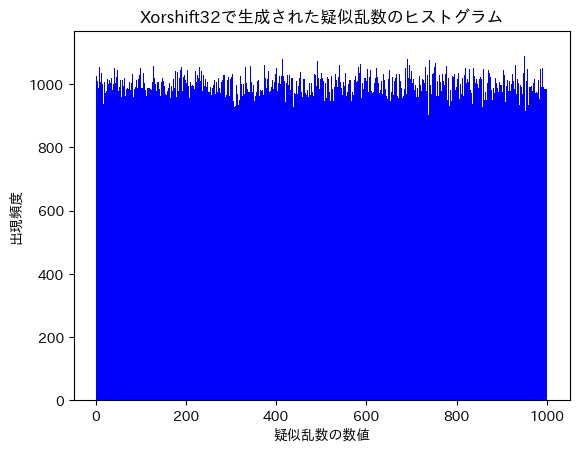

最大値: (1113, 904)
最小値: (885, 276)
平均値: 1000.0


In [14]:
import matplotlib.pyplot as plt
import japanize_matplotlib

def main():
    MAX = 1000

    x_32 = xorshift32(2463534242)
    rand_nums = []  # 生成された乱数を格納するリスト
    rand_hist = [0] * MAX  # ヒストグラム用のリスト
    
    # 100000個の乱数を生成し, リストに追加
    for i in range(1000000):
        rand_num = x_32() % 1000 + 1
        rand_nums.append(rand_num)
        rand_hist[rand_num - 1] += 1
        
    # ヒストグラムを作成
    plt.hist(rand_nums, bins=1000, color='blue')
    plt.title('Xorshift32で生成された疑似乱数のヒストグラム')
    plt.xlabel('疑似乱数の数値')
    plt.ylabel('出現頻度')
    plt.show()

    # 出現頻度の最大値, 最小値, 平均値を表示
    print(f'最大値: {max(rand_hist),rand_hist.index(max(rand_hist))}')
    print(f'最小値: {min(rand_hist),rand_hist.index(min(rand_hist))}')
    print(f'平均値: {sum(rand_hist) / MAX}')

if __name__ == '__main__':
    main()

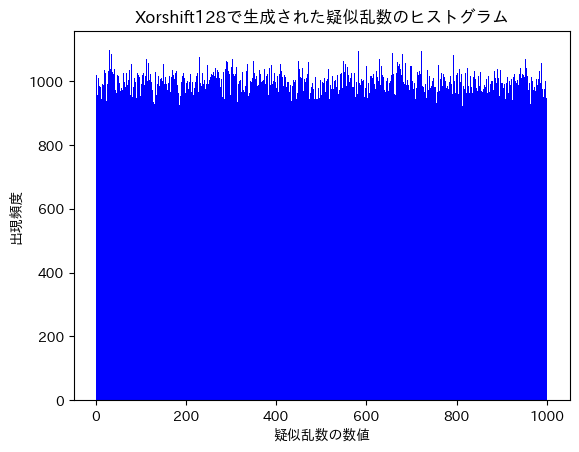

最大値: (1102, 168)
最小値: (890, 727)
平均値: 1000.0


In [15]:
import matplotlib.pyplot as plt
import japanize_matplotlib

def main():
    MAX = 1000
    x_128 = xorshift128(x=123456789, y=362436069, z=521288629, w=88675123)
    rand_nums = []  # 生成された乱数を格納するリスト
    rand_hist = [0] * MAX  # ヒストグラム用のリスト
    
    # 100000個の乱数を生成し, リストに追加
    for i in range(1000000):
        rand_num = x_128() % MAX + 1
        rand_nums.append(rand_num)
        rand_hist[rand_num - 1] += 1
        
    # ヒストグラムを作成
    plt.hist(rand_nums, bins=MAX, color='blue')
    plt.title('Xorshift128で生成された疑似乱数のヒストグラム')
    plt.xlabel('疑似乱数の数値')
    plt.ylabel('出現頻度')
    plt.show()

    # 出現頻度の最大値, 最小値, 平均値を表示
    print(f'最大値: {max(rand_hist),rand_hist.index(max(rand_hist))}')
    print(f'最小値: {min(rand_hist),rand_hist.index(min(rand_hist))}')
    print(f'平均値: {sum(rand_hist) / MAX}')
    

if __name__ == '__main__':
    main()

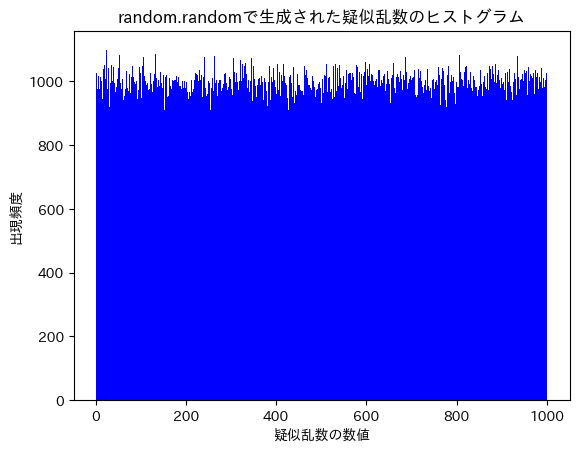

最大値: (1103, 325)
最小値: (907, 303)
平均値: 1000.0


In [16]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import random

random.seed(20150919)
MAX = 1000

rand_nums = []  # 乱数を格納するリストを初期化
rand_hist = [0] * MAX  # ヒストグラム用のリストを初期化

# 1000000個の乱数を生成し, リストに追加
for i in range(1000000):
    #rand_num = random.random() % MAX + 1  # 0.0以上1000.0未満の乱数を生成
    rand_num = random.randint(1, MAX)
    rand_nums.append(rand_num)
    rand_hist[int(rand_num) - 1] += 1

# ヒストグラムを作成
plt.hist(rand_nums, bins=1000, color='blue')
plt.title('random.randomで生成された疑似乱数のヒストグラム')
plt.xlabel('疑似乱数の数値')
plt.ylabel('出現頻度')
plt.show()

# 出現頻度の最大値, 最小値, 平均値を表示

print(f'最大値: {max(rand_hist),rand_hist.index(max(rand_hist))}')
print(f'最小値: {min(rand_hist),rand_hist.index(min(rand_hist))}')
print(f'平均値: {sum(rand_hist) / MAX}')

# 各々の乱数生成アルゴリズムのメモリ使用量

In [17]:
import tracemalloc

# メモリ追跡を開始
tracemalloc.start()

# 乱数を生成
mt = MT(20150919)
for n in range(1000000):
    n = mt.next()

# 現在のメモリ使用量とピークメモリ使用量を取得
current, peak = tracemalloc.get_traced_memory()

# メモリ追跡を停止
tracemalloc.stop()

print(f"現在のメモリ使用量: {current / 10**3}KB")
print(f"ピーク時のメモリ使用量: {peak / 10**3}KB")

現在のメモリ使用量: 27.81KB
ピーク時のメモリ使用量: 47.794KB


In [18]:
import tracemalloc

# メモリ追跡を開始
tracemalloc.start()

# 乱数を生成
x_32 = xorshift32(2463534242)
for m in range(1000000):
    m = x_32()

# 現在のメモリ使用量とピークメモリ使用量を取得
current, peak = tracemalloc.get_traced_memory()

# メモリ追跡を停止
tracemalloc.stop()

print(f"現在のメモリ使用量: {current / 10**3}KB")
print(f"ピーク時のメモリ使用量: {peak / 10**3}KB")

現在のメモリ使用量: 4.247KB
ピーク時のメモリ使用量: 22.441KB


In [19]:
import tracemalloc

# メモリ追跡を開始
tracemalloc.start()

# 乱数を生成
x_128 = xorshift128(x=123456789, y=362436069, z=521288629, w=88675123)
for k in range(1000000):
    k = x_128()

# 現在のメモリ使用量とピークメモリ使用量を取得
current, peak = tracemalloc.get_traced_memory()

# メモリ追跡を停止
tracemalloc.stop()

print(f"現在のメモリ使用量: {current / 10**3}KB")
print(f"ピーク時のメモリ使用量: {peak / 10**3}KB")

現在のメモリ使用量: 5.05KB
ピーク時のメモリ使用量: 23.239KB


In [20]:
import random
import tracemalloc

# メモリ追跡を開始
tracemalloc.start()

# 乱数を生成
for p in range(1000000):
    p = random.random()

# 現在のメモリ使用量とピークメモリ使用量を取得
current, peak = tracemalloc.get_traced_memory()

# メモリ追跡を停止
tracemalloc.stop()

print(f"現在のメモリ使用量: {current / 10**3}KB")
print(f"ピーク時のメモリ使用量: {peak / 10**3}KB")

現在のメモリ使用量: 3.203KB
ピーク時のメモリ使用量: 21.813KB
